# 資料匯入

In [1]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5") #也可load sklearn內建iris datasets
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X = df.drop('屬種',axis=1)
y = df['屬種']

In [3]:
X.corr()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


# PCA (n=4)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

X

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02],
       [ -2.27989736e+00,   7.47782713e-01,   1.74325619e-01,
         -2.71468037e-02],
       [ -2.82089068e+00,  -8.21045110e-02,   2.64251085e-01,
         -5.00996251e-02],
       [ -2.62648199e+00,   1.70405349e-01,  -1.58015103e-02,
         -4.62817610e-02],
       [ -2.88795857e+00,  -5.70798026e-01,   2.73354061e-02,
         -2.66154143e-02],
       [ -2.67384469e+00,  -1.06691704e-01,  -1.91533300e-01,
         -5.58909660e-02],
       [ -2.50652679e+00,   6.51935014e-01,  -6.92749958e-02,
         -1.66082478e-02],
       [ -2.61314272e

### 解釋共變異數比率

In [5]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

In [6]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

In [7]:
p_accu = accumulate(pca.explained_variance_ratio_)
p_accu

[0.9246162071742684, 0.97763177502480336, 0.99481691454981014, 1.0]

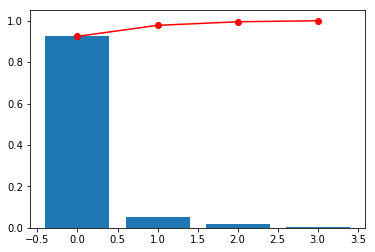

In [8]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

# PCA (n=2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [10]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [11]:
pd.DataFrame(X).corr()

,0,1
0,1.000000e+00,7.247492e-16
1,7.247492e-16,1.000000e+00


In [12]:
from sklearn.preprocessing import LabelEncoder
# 把類別轉成0,1,2，散佈圖上色用
le = LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_label = le.transform(y)

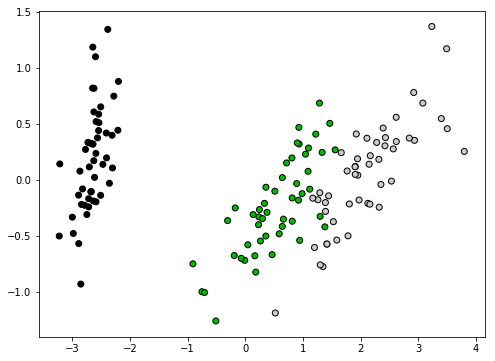

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_label, cmap=plt.cm.spectral, edgecolor='k')
plt.show()

# KNN

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 準確度 & 混淆矩陣

In [17]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        14

    avg / total       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 14  1]
 [ 0  1 13]]
